## Import

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

sys.path.append("../src")
import segment

In [24]:
df = pd.read_csv("../data/raw/newtrain.csv")

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [6]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1180
smoking_status       10775
stroke                   0
dtype: int64

# Customer Segmentation

In [25]:
df.drop(['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'bmi'], axis=1, inplace=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke
0,3.0,0,0,95.12,0
1,58.0,1,0,87.96,0
2,8.0,0,0,110.89,0
3,70.0,0,0,69.04,0
4,14.0,0,0,161.28,0


In [26]:
df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
stroke               0
dtype: int64

In [27]:
pca = segment.get_pca_model(df)
pca_df = segment.reduce_dimension(df, pca)
pca_df.head()

,x,y,z
0,-15.612245,37.229071,0.042801
1,-13.846646,-18.209644,0.857088
2,0.755969,34.826288,0.014205
3,-30.595460,-33.088846,-0.167363
4,51.455490,36.995661,-0.043044


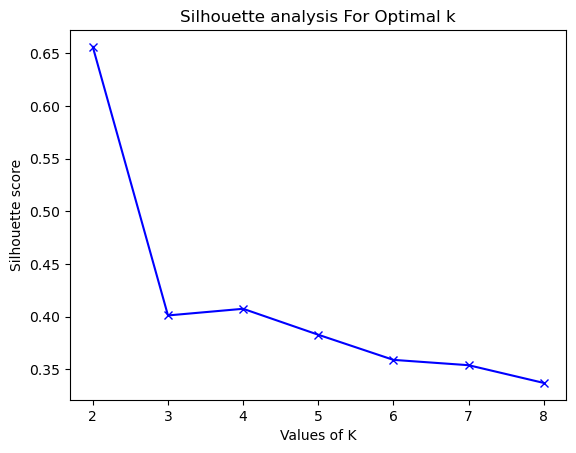

In [28]:
# silhouette score and graph
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pca_df)
    cluster_labels = kmeans.labels_

# silhouette score
    silhouette_avg.append(segment.get_silhouette_score(pca_df, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, "bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [29]:
num_clusters = 3 
model = KMeans(n_clusters=num_clusters)
yhat = model.fit_predict(pca_df)

In [30]:
pca_df = segment.insert_clusters_to_df(pca_df, yhat)

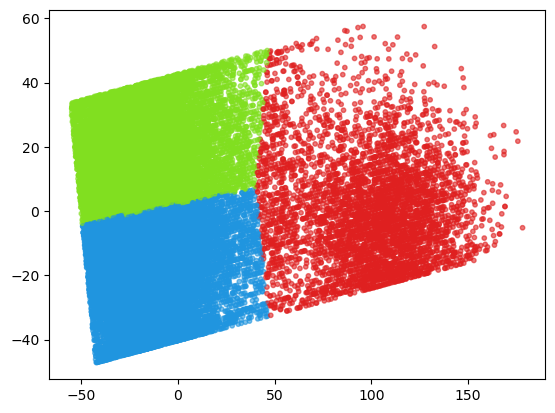

In [31]:
# get centroids
centroids = model.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to df
pca_df['cen_x'] = pca_df.clusters.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
pca_df['cen_y'] = pca_df.clusters.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
pca_df['c'] = pca_df.clusters.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(pca_df['x'], pca_df['y'], c=pca_df.c, alpha = 0.6, s=10)
plt.show()

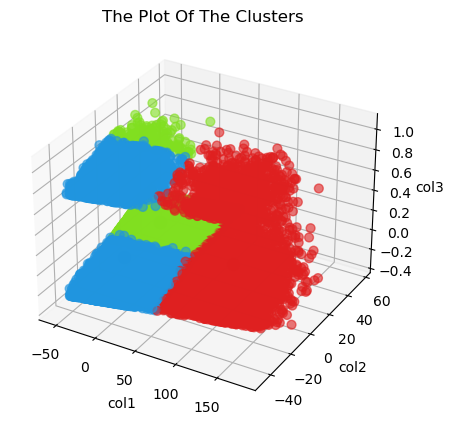

In [32]:
centroids = model.cluster_centers_
segment.plot_clusters(pca_df, yhat, centroids)

In [33]:
pca_df['clusters'].value_counts()

2    15636
1    14847
0     4616
Name: clusters, dtype: int64